In [1]:
import sys,os,glob
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import pylhe

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
inputFiles = {'Form Factor' : './pp2Htt_collier/Events/run_03/unweighted_events.lhe.gz',
              'Heavy Top' : './pp2Htt_collier/Events/run_02/unweighted_events.lhe.gz',
              'Loop' : './pp2Htt_loop/Events/run_02/unweighted_events.lhe.gz'}

events = {}
for label, inputF in inputFiles.items():
    events[label] = pylhe.read_lhe_with_attributes(inputF)

In [3]:
mttDict = {}

for label,evts in events.items():
    mttDict[label] = []
    
    for evt in evts:
        tops = []
        for particle in evt.particles:
            if int(abs(particle.id)) != 6: continue
            if int(abs(particle.status)) != 1: continue
            tops.append(particle)

        ptt = np.array([sum([getattr(t,plabel) for t in tops]) for plabel in ['e','px','py','pz']])
        mtt = np.sqrt(ptt[0]**2 - np.linalg.norm(ptt[1:])**2)
        mttDict[label].append(mtt)


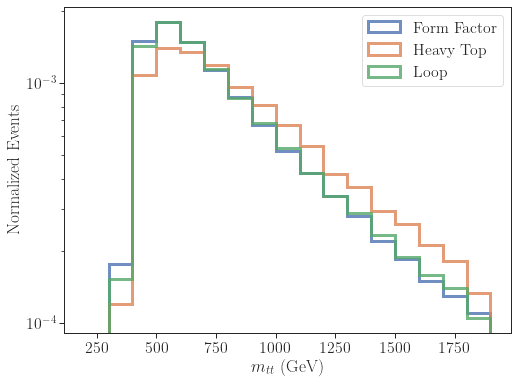

In [4]:
fig = plt.figure(figsize=(8,6))

for label,mttList in mttDict.items():
    plt.hist(mttList,bins=np.arange(200,2000,100.),label=label,histtype='step',
             linewidth=3,alpha=0.8,density=True)
    
plt.yscale('log')
plt.ylabel('Normalized Events')
plt.xlabel(r'$m_{tt}$ (GeV)')
plt.legend()
plt.show()